In [1]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from sklearn.datasets import load_iris
import altair as alt
alt.renderers.set_embed_options(actions=False)
data = load_iris(as_frame=True)

# Getting started

IDendro integrates seamlessly with outputs from your favorite hierarchical clustering library, with one-line drop-ins for SciPy, HDBScan and Scikit-learn agglomerative clustering, while dendrograms can be visualized in Plotly, Altair and Matplotlib (limited support). Switching visualization frontends is as simple as passing an argument to the `plot()` function.

## Basic usage

In [9]:
import idendro
import scipy.cluster.hierarchy as sch
from idendro.targets.altair import to_altair

#cluster the data
linkage_matrix = sch.linkage(
    data['data'], method='single', metric='euclidean'
)
threshold = 0.8
flat_clusters = sch.fcluster(
    linkage_matrix, t=threshold, criterion='distance'
)

#wrap clustering outputs / parameters into a container
cl_data = idendro.ClusteringData(
    linkage_matrix = linkage_matrix, 
    cluster_assignments = flat_clusters
)

#pass to idendro and visualize
idd = idendro.IDendro()
idd.set_cluster_info(cl_data)
dendrogram = idd.create_dendrogram(truncate_mode='level', p=10)
to_altair(dendrogram=dendrogram, height=200, width=629)

alt.LayerChart(...)

## Clustering library integration

### scipy.hierarchy.cluster

IDendro is built to support SciPy's hierarchical clustering data structures (linkage matrix and flat cluster assignments). As a result, using IDendro is as simple as passing outputs of `scipy.cluster.hierarchy.linkage` and `scipy.cluster.hierarchy.fcluster` functions. 

In [ ]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import altair 
altair.renderers.set_embed_options(actions=False)
pass

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
import idendro

# do the usual scipy hierarchical clustering
data = load_iris(as_frame=True)
linkage_matrix = sch.linkage(
    data['data'], method='single', metric='euclidean'
)
flat_clusters = sch.fcluster(
    linkage_matrix, t=0.8, criterion='distance'
)

#pass it to idendro and visualize
cl_data = idendro.ClusteringData(
    linkage_matrix = linkage_matrix, 
    cluster_assignments = flat_clusters
)

idd = idendro.IDendro()
idd.set_cluster_info(cl_data)

idd.create_dendrogram().plot(
    backend='altair',
    height=200, width=629,
)

629


alt.LayerChart(...)

#### Using previously created SciPy's dendrogram objects

In some situations, you may have a dendrogram object created by SciPy that you want to visualize using IDendro. That's possible, too.

In [ ]:
## create a scipy dendrogram object
D = sch.dendrogram(
    linkage_matrix, 
    p=4, truncate_mode="level",
    no_plot=True
)

If you have just the dendrogram object (and not the underlying linkage matrix), you cannot compute/plot the nodes in the dendrogram, but you can still use the available backends.

In [ ]:
## pass it to idendro and visualize
idd = idendro.IDendro()
idd.convert_scipy_dendrogram(D, compute_nodes=False).plot(
    backend='altair',
    height=200, width=629,
    show_nodes=False
)

alt.LayerChart(...)

Note that not all customization functionality is available when using SciPy's dendrogram objects. In most cases, it is recommended that you generate the dendrogram with IDendro itself.

### sklearn.cluster.AgglomerativeClustering

To use [scikit-learn agglomerative clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html) outputs, wrap the fit object with `idendro.ScikitLearnClusteringData` before passing it to IDendro.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import idendro

data = load_iris(as_frame=True)

# do the usual scikit-learn hierarchical clustering
model = AgglomerativeClustering(
    distance_threshold=0.8,
    linkage='single',
    n_clusters=None
).fit(data['data'])

#pass it to idendro and visualize
idd = idendro.IDendro()
idd.set_cluster_info(idendro.ScikitLearnClusteringData(model))

idd.create_dendrogram().plot(
    backend='altair',
    height=200, width=629
)

alt.LayerChart(...)

### HDBSCAN

IDendro can visualize [HDBSCAN](https://hdbscan.readthedocs.io/) clustering results, too. Wrap the HDBSCAN model object with `idendro.HDBSCANClusteringData` before passing it as clustering information. The model object is available via `cluster_data.get_model()` function in all callback functions (see case studies for ideas on how it can be leveraged).

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN()
clusterer.fit(data['data'])

#pass it to idendro and visualize
idd = idendro.IDendro()
idd.set_cluster_info(idendro.HDBSCANClusteringData(clusterer))

idd.create_dendrogram().plot(
    backend='altair',
    height=200, width=629
)

alt.LayerChart(...)

## Visualization backend support

IDendro can visualize dendrograms in Plotly, Altair and Matplotlib (limited support). Switching visualization frontends is as simple as passing an argument to the `plot()` function.

Alternatively, you can also use helper functions available at `idendro.targets` (`to_altair`, `to_plotly`, `to_matplotlib`, `to_json`).

In [ ]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import altair 
altair.renderers.set_embed_options(actions=False)
pass

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
import idendro
from matplotlib import pyplot as plt

# do the usual scipy hierarchical clustering
data = load_iris(as_frame=True)
linkage_matrix = sch.linkage(
    data['data'], method='single', metric='euclidean'
)
flat_clusters = sch.fcluster(
    linkage_matrix, t=0.8, criterion='distance'
)

#pass it to idendro and visualize
cl_data = idendro.ClusteringData(
    linkage_matrix = linkage_matrix, 
    cluster_assignments = flat_clusters
)

idd = idendro.IDendro()
idd.set_cluster_info(cl_data)

dendrogram = idd.create_dendrogram()

### Altair

In [ ]:
dendrogram.plot(
    backend='altair',
    height=200, width=629,    
)

alt.LayerChart(...)

### Plotly

In [ ]:
dendrogram.plot(
    backend='plotly',
    height=400, width=650,
)

### Matplotlib

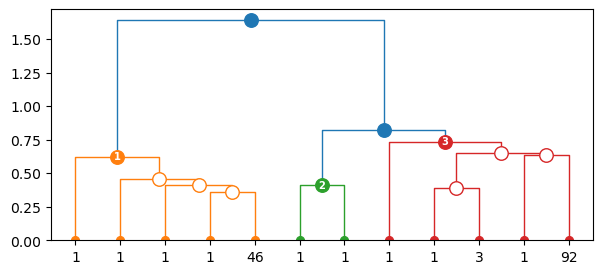

In [ ]:
dendrogram.plot(
    backend='matplotlib',
    height=300, width=750,
    show_nodes=True
)
plt.show()

### Compatibility differences

IDendro aims to produce identical outputs no matter what the visualization frontend is used (visualization library defaults not withstanding). However, this is not always possible. Some caveats include:

 - `symlog` scale type is not supported by Plotly;
 - `ClusterLink.strokedash` property may need to be tweaked to achieve identically looking results among the libraries
 - Matplotlib functionality is limited to static charts; attempt is made to convert most size parameters to pixels (in line with Altair and Plotly), but some differences may remain.

In case IDendro does not produce the required result out of the box, see [Customizing other attributes](/guides/custom-attributes) section for guidance on how to make further customizations that fit your needs.